In [3]:
from langchain_community.document_loaders import TextLoader

In [4]:
loader=TextLoader('nvda_news_1.txt')
data = loader.load()

In [9]:
data[0]

Document(metadata={'source': 'nvda_news_1.txt'}, page_content="The stock of NVIDIA Corp (NASDAQ:NVDA) experienced a daily loss of -3.56% and a 3-month gain of 32.35%. With an Earnings Per Share (EPS) (EPS) of $1.92, the question arises: is the stock significantly overvalued? This article aims to provide a detailed valuation analysis of NVIDIA, offering insights into its financial strength, profitability, growth, and more. We invite you to delve into this comprehensive analysis.\n\nCompany Overview\nWarning! GuruFocus has detected 10 Warning Signs with NVDA. Click here to check it out.\n\nNVDA 30-Year Financial Data\n\nThe intrinsic value of NVDA\n\n\nNVIDIA Corp (NASDAQ:NVDA) is a leading designer of discrete graphics processing units that enhance the experience on computing platforms. The firm's chips are widely used in various end markets, including PC gaming and data centers. In recent years, NVIDIA has broadened its focus from traditional PC graphics applications such as gaming to 

In [11]:
data[0].page_content

"The stock of NVIDIA Corp (NASDAQ:NVDA) experienced a daily loss of -3.56% and a 3-month gain of 32.35%. With an Earnings Per Share (EPS) (EPS) of $1.92, the question arises: is the stock significantly overvalued? This article aims to provide a detailed valuation analysis of NVIDIA, offering insights into its financial strength, profitability, growth, and more. We invite you to delve into this comprehensive analysis.\n\nCompany Overview\nWarning! GuruFocus has detected 10 Warning Signs with NVDA. Click here to check it out.\n\nNVDA 30-Year Financial Data\n\nThe intrinsic value of NVDA\n\n\nNVIDIA Corp (NASDAQ:NVDA) is a leading designer of discrete graphics processing units that enhance the experience on computing platforms. The firm's chips are widely used in various end markets, including PC gaming and data centers. In recent years, NVIDIA has broadened its focus from traditional PC graphics applications such as gaming to more complex and favorable opportunities, including artificial

In [12]:
from langchain.document_loaders import CSVLoader

In [13]:
loadcsv = CSVLoader('sample.csv')
datacsv = loadcsv.load()

In [14]:
datacsv

[Document(metadata={'source': 'sample.csv', 'row': 0}, page_content='text: Meditation and yoga can improve mental health\ncategory: Health'),
 Document(metadata={'source': 'sample.csv', 'row': 1}, page_content='text: Fruits, whole grains and vegetables helps control blood pressure\ncategory: Health'),
 Document(metadata={'source': 'sample.csv', 'row': 2}, page_content='text: These are the latest fashion trends for this week\ncategory: Fashion'),
 Document(metadata={'source': 'sample.csv', 'row': 3}, page_content='text: Vibrant color jeans for male are becoming a trend\ncategory: Fashion'),
 Document(metadata={'source': 'sample.csv', 'row': 4}, page_content='text: The concert starts at 7 PM tonight\ncategory: Event'),
 Document(metadata={'source': 'sample.csv', 'row': 5}, page_content='text: Navaratri dandiya program at Expo center in Mumbai this october\ncategory: Event'),
 Document(metadata={'source': 'sample.csv', 'row': 6}, page_content='text: Exciting vacation destinations for your

In [15]:
len(datacsv)

8

In [16]:
datacsv[1]

Document(metadata={'source': 'sample.csv', 'row': 1}, page_content='text: Fruits, whole grains and vegetables helps control blood pressure\ncategory: Health')

In [17]:
from langchain.document_loaders import UnstructuredURLLoader

In [20]:
loader = UnstructuredURLLoader(urls=[
    "https://finance.yahoo.com/news/hsbc-investing-changes-mean-portfolio-230038649.html",
    "https://www.bbc.com/news/articles/c4gm9j11mvdo"
])

In [21]:
data = loader.load()

In [22]:
len(data)

2

In [23]:
data[0]

Document(metadata={'source': 'https://finance.yahoo.com/news/hsbc-investing-changes-mean-portfolio-230038649.html'}, page_content='We are experiencing some temporary issues. The market data on this page is currently delayed. Please bear with us as we address this and restore your personalized lists.\n\nHere’s What HSBC’s Investing Changes Mean for Your Portfolio\n\nMarc Guberti\n\nSun, Feb 9, 2025, 3:00 PM 4 min read\n\nHSBC recently made a major announcement that will impact account holders and investors. The company is winding down some of its equities businesses in Europe and the Americas. The bank is also wrapping up its M&A activity in Europe and the Americas. Instead of focusing on those regions, HSBC will prioritize Asia and the Middle East.\n\nRead More: I’m a Bank Teller: Here Are 10 Mistakes You Are Making With Your Banking\n\nFind Out: 5 Subtly Genius Moves All Wealthy People Make With Their Money\n\nWondering how this will affect HSBC customers and investors? Here are the f

# Text Splitting to chunks: llm has token limitation

split to chunk(devide to smaller chunk so it will not acceed the llm limit) -> then merge chunk(llm will perfom well when chunk is almost equel to token limit) 

In [35]:
text = """LangChain is a software framework that helps facilitate the integration of large language 
models (LLMs) into applications. As a language model integration framework, LangChain's use-cases 
largely overlap with those of language models in general, including document analysis and 
summarization, chatbots, and code analysis.
LangChain was launched in October 2022 as an open source project by Harrison Chase, while 
working at machine learning startup Robust Intelligence. The project quickly garnered popularity,[3] with improvements from hundreds of contributors on GitHub, trending discussions on Twitter, lively activity on the project's Discord server, many YouTube tutorials, and meetups in San 
Francisco and London. In April 2023, LangChain had incorporated and the new startup raised over 
$20 million in funding at a valuation of at least $200 million from venture firm Sequoia Capital, 
a week after announcing a $10 million seed investment from Benchmark. In the third quarter of 2023, the LangChain Expression Language (LCEL) was introduced, which provides a declarative way to define chains of actions. In October 2023 LangChain introduced LangServe, a deployment tool to host LCEL 
code as a production-ready API."""

In [36]:
#we can use slice operater of python to split. but it splits by character.so if
# there is a word called " I am from Anuradhapura" if we want to split this with 15 words. it split the Anuradhapura 
#with 2 parts so the meaning will be broken. so we must not split any single word. so python split is not
#suitable
text[:200]

"LangChain is a software framework that helps facilitate the integration of large language \nmodels (LLMs) into applications. As a language model integration framework, LangChain's use-cases \nlargely ov"

In [37]:
#you can see above it broke the word 'overlap' and gave like ov

In [38]:
#so use CharacterTextSplitter
from langchain.text_splitter import CharacterTextSplitter

In [39]:
splitter = CharacterTextSplitter(
    separator="\n",  #split by new line
    chunk_size=200,
    chunk_overlap=0 #when merging
)

In [40]:
chunks = splitter.split_text(text)

Created a chunk of size 285, which is longer than the specified 200
Created a chunk of size 298, which is longer than the specified 200


In [41]:
len(chunks)

7

In [42]:
len(chunks[0])

188

In [43]:
for i in range(len(chunks)):
    print(len(chunks[i]))

188
134
89
284
194
297
31


u can see a problem above some chunks are larger than the limit size. it is because of the separator issue
it separates by \n . but some sentense are so big and the \n is in above 200 limit. so we can change the separator to '.' or ' ' or \n\n
but it cannot give the best result. so we need a option to specify multiple separators like \n then . then ' ' then \n\n. 
this option is not in the CharacterTextSplitter so we need to use RecursiveCharacterTextSplitter

In [44]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [46]:
splitter = RecursiveCharacterTextSplitter(
    separators=['\n\n','\n',' '],
    chunk_size=200,
    chunk_overlap=0
)

In [48]:
chunks = splitter.split_text(text)

In [49]:
len(chunks)

9

In [52]:
for chunk in chunks:
    print(len(chunk))

188
134
89
199
84
194
199
97
31


# so how  it works


In [53]:
# first it split by \n\n
cs = text.split('\n\n')
for c in cs:
    print(len(c))

1228


In [54]:
first_split = cs
len(first_split)

1

In [55]:
first_split

["LangChain is a software framework that helps facilitate the integration of large language \nmodels (LLMs) into applications. As a language model integration framework, LangChain's use-cases \nlargely overlap with those of language models in general, including document analysis and \nsummarization, chatbots, and code analysis.\nLangChain was launched in October 2022 as an open source project by Harrison Chase, while \nworking at machine learning startup Robust Intelligence. The project quickly garnered popularity,[3] with improvements from hundreds of contributors on GitHub, trending discussions on Twitter, lively activity on the project's Discord server, many YouTube tutorials, and meetups in San \nFrancisco and London. In April 2023, LangChain had incorporated and the new startup raised over \n$20 million in funding at a valuation of at least $200 million from venture firm Sequoia Capital, \na week after announcing a $10 million seed investment from Benchmark. In the third quarter o

In [59]:
#so langchain check wether the len exceed the chunk size. if exceeds it split by 2nd separator \n

second_split=first_split[0].split("\n")

In [60]:
second_split

['LangChain is a software framework that helps facilitate the integration of large language ',
 "models (LLMs) into applications. As a language model integration framework, LangChain's use-cases ",
 'largely overlap with those of language models in general, including document analysis and ',
 'summarization, chatbots, and code analysis.',
 'LangChain was launched in October 2022 as an open source project by Harrison Chase, while ',
 "working at machine learning startup Robust Intelligence. The project quickly garnered popularity,[3] with improvements from hundreds of contributors on GitHub, trending discussions on Twitter, lively activity on the project's Discord server, many YouTube tutorials, and meetups in San ",
 'Francisco and London. In April 2023, LangChain had incorporated and the new startup raised over ',
 '$20 million in funding at a valuation of at least $200 million from venture firm Sequoia Capital, ',
 'a week after announcing a $10 million seed investment from Benchmark

In [61]:
len(second_split)

10

In [62]:
for sp in second_split:
    print(len(sp))

90
98
90
43
90
285
96
98
298
31


In [ ]:
#then it split by ' ' separator. and finally it will come to 200 or below

In [64]:
for i in chunks:
    print(len(i))

188
134
89
199
84
194
199
97
31


# now we will convert the chunks into embeddings(openai,huggingface embedding) then we will store them into a vector db - FAISS(in memory structure: faster search on your vectors)
The embeddings will be represented as floating-point vectors in high-dimensional space (e.g., 1536 dimensions for OpenAI’s embeddings).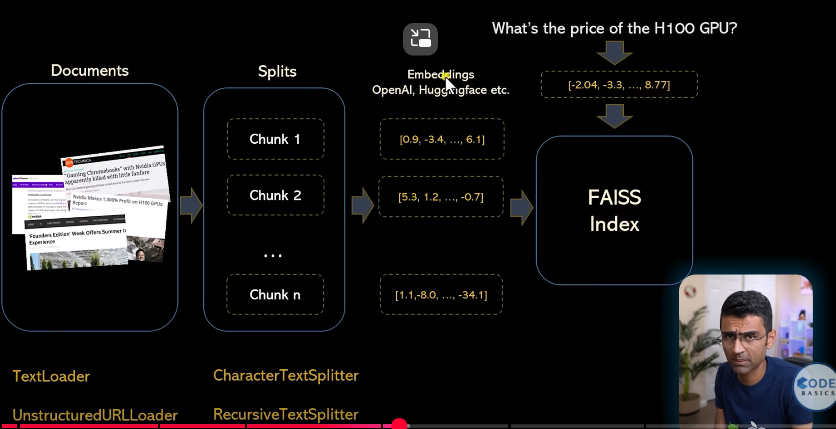

when we ask a question it will embedded and go to faiss.
lets say we have 1 million vectors from the link. 
then faiss will efficiently perform a search for the question vector.
and faiss will tell how many vectors are similar to the question vector in the 1 million vecotrs